# CAN data Analysis using `strym`

In this notebook, we will analyze data rates throughput and the timeseries characteristics of certain CAN message collected from Toyota RAV4 using Giraffee connector and Panda. At the same time, out objective is to look for fuel data about which don't have much information through DBC file.

## Importing packages
Import required packages

In [1]:
from strym import strymread
import strym
import matplotlib.pyplot as plt
import numpy as np

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading BokehJS ...

## Specify Data Location

In [2]:
datafolder = "../../PandaData/2020_08_17/"
import glob
csvlist = glob.glob(datafolder+"*.csv")

In [3]:
num_of_files = len(csvlist)
print("Total number of datafiles in {} is {}.".format(datafolder, num_of_files))

Total number of datafiles in ../../PandaData/2020_08_17/ is 18.


## Analysis
### 1. CSV file containing all messages
In this section, we will analyze CSV-formatted CAN Data for data throughput, rates and data distribution.

In [4]:
dbcfile = '../examples/newToyotacode.dbc'
drive1filename=datafolder + "2020-08-17-15-43-47_2T3Y1RFV8KC014025_CAN_Messages.csv"
r0 = strymread(csvfile=drive1filename, dbcfile=dbcfile)

### First plot the count statistics of CAN messages

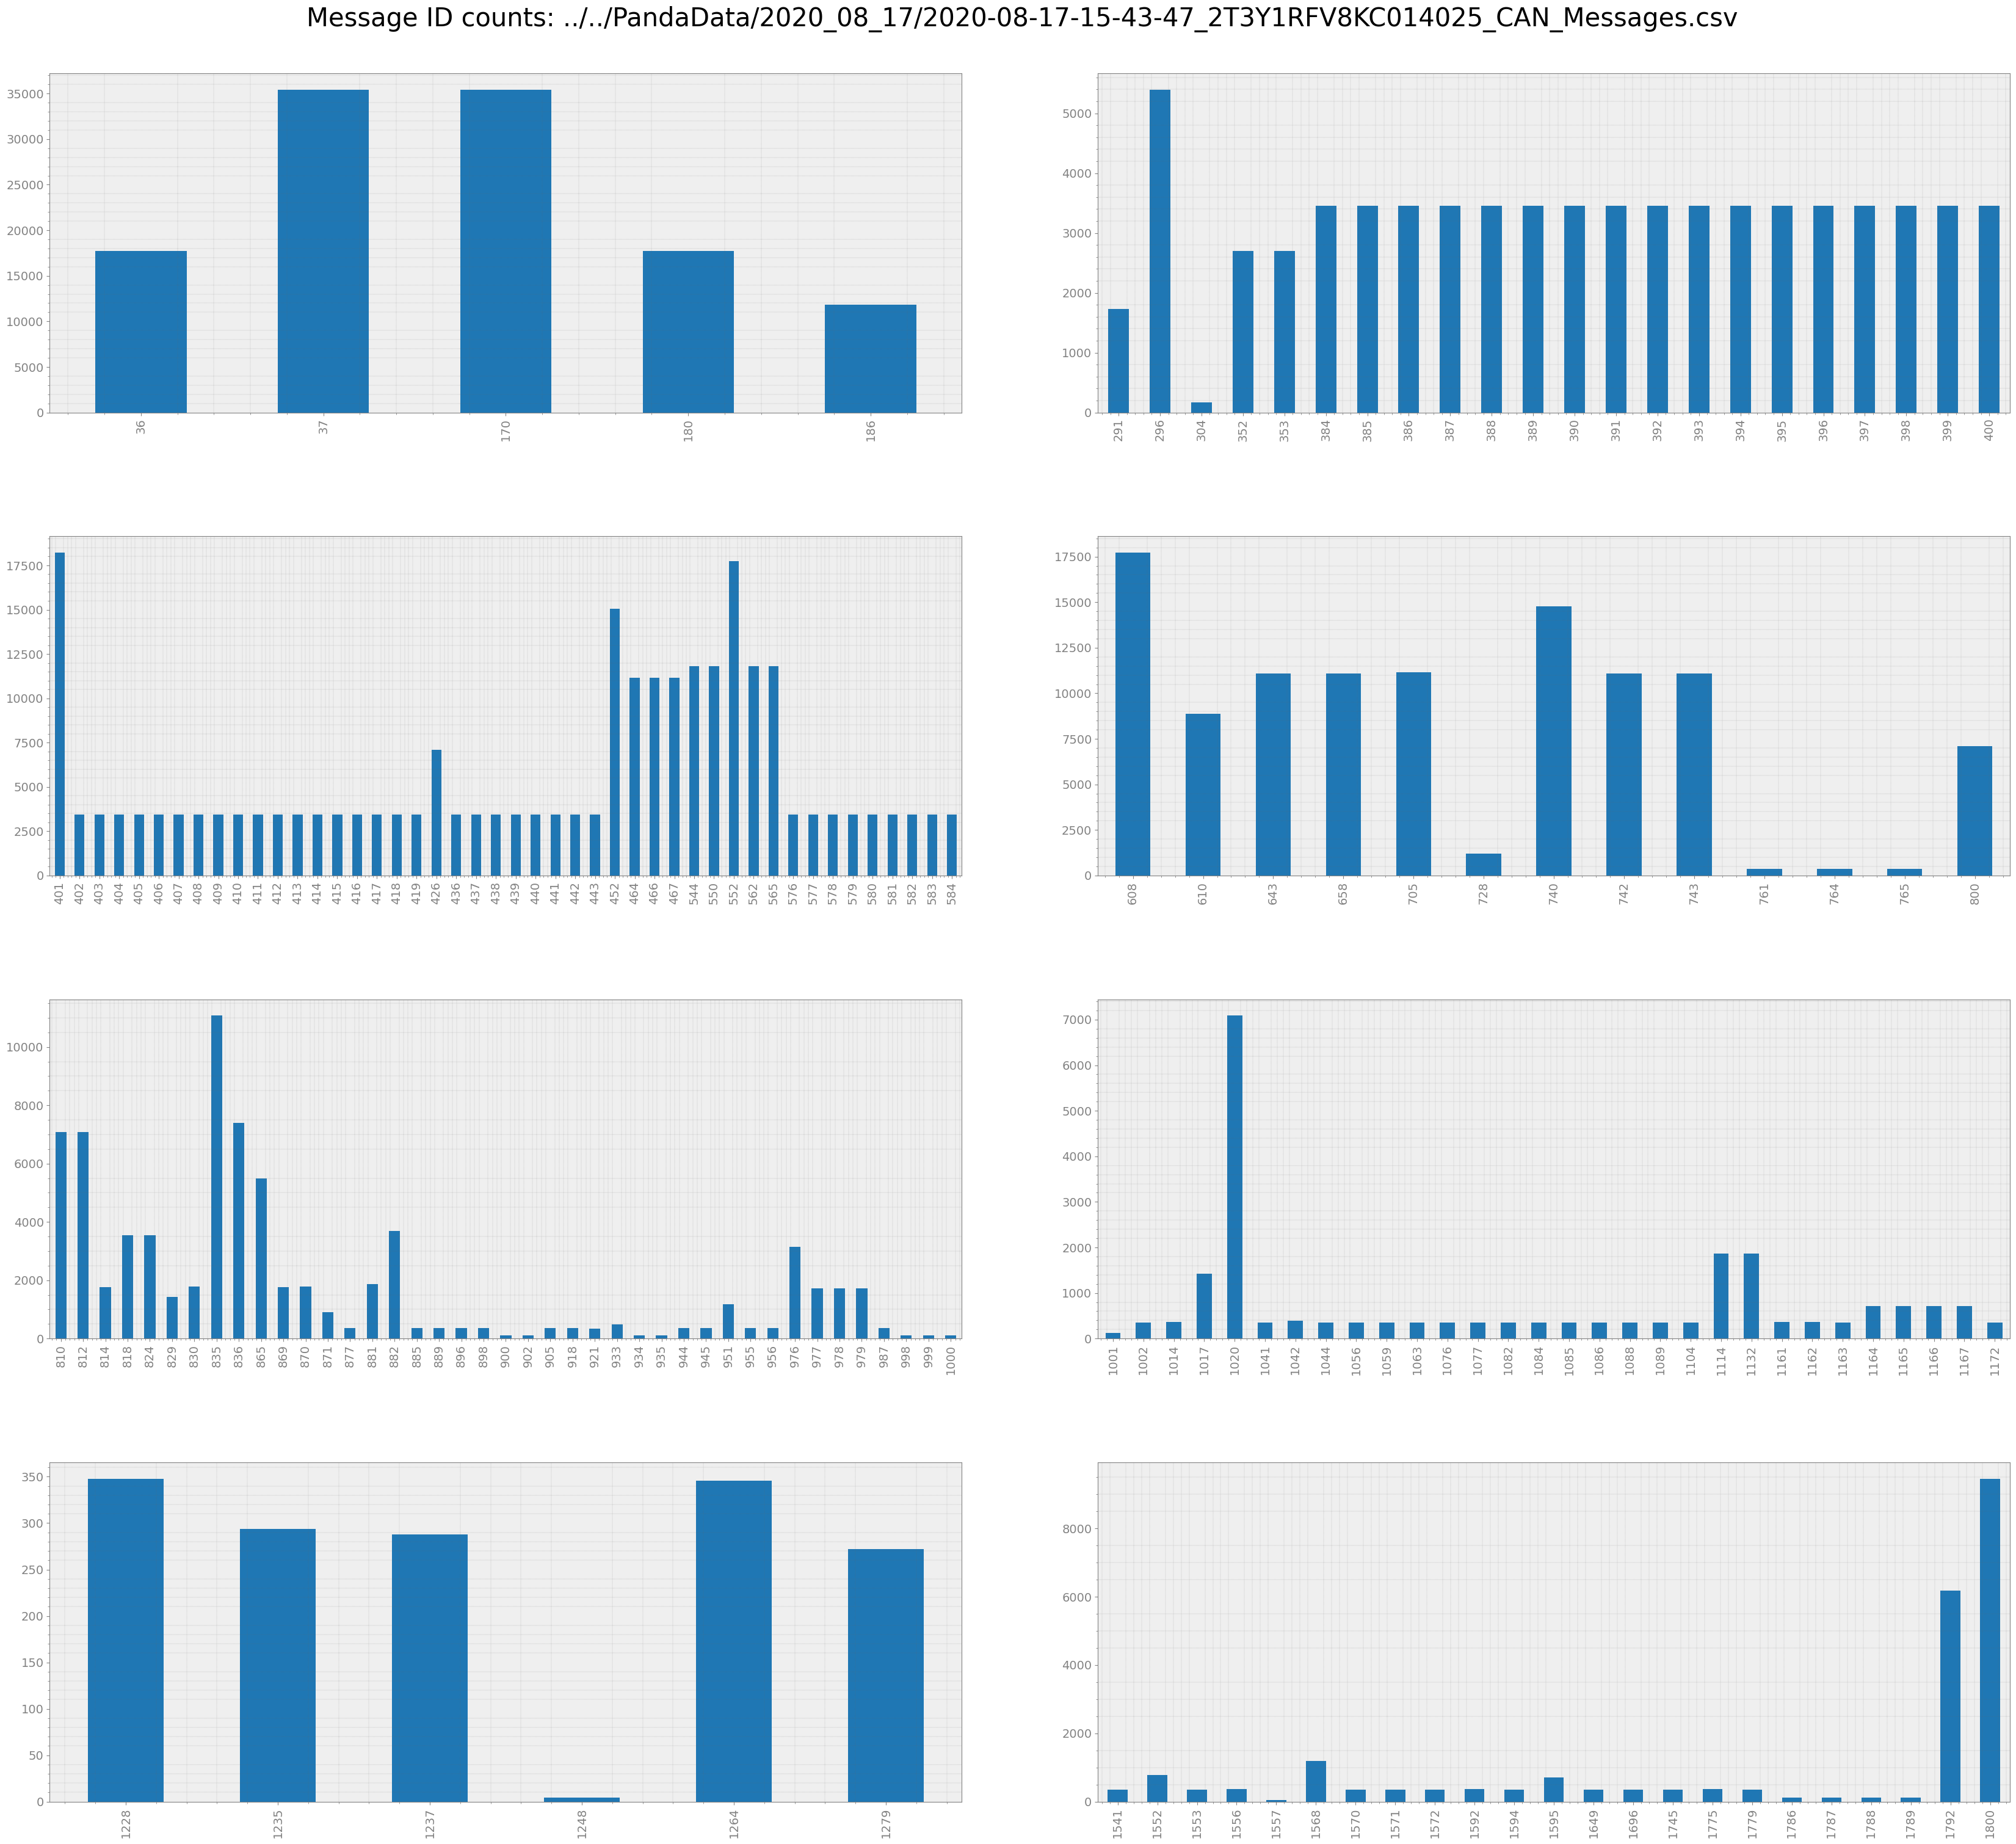

,MessageID,Counts_Bus_0,Counts_Bus_1,Counts_Bus_2,TotalCount
36,36,8863,0,8863,17726
37,37,17726,0,17726,35452
170,170,17726,0,17726,35452
180,180,8863,0,8863,17726
186,186,5909,0,5909,11818
...,...,...,...,...,...
1787,1787,59,0,59,118
1788,1788,59,0,59,118
1789,1789,59,0,59,118
1792,1792,3049,84,3049,6182


In [5]:
r0.count(plot=True)

As you can see this particular csv file recorded all messages.

### Plot the speed as timeseries data

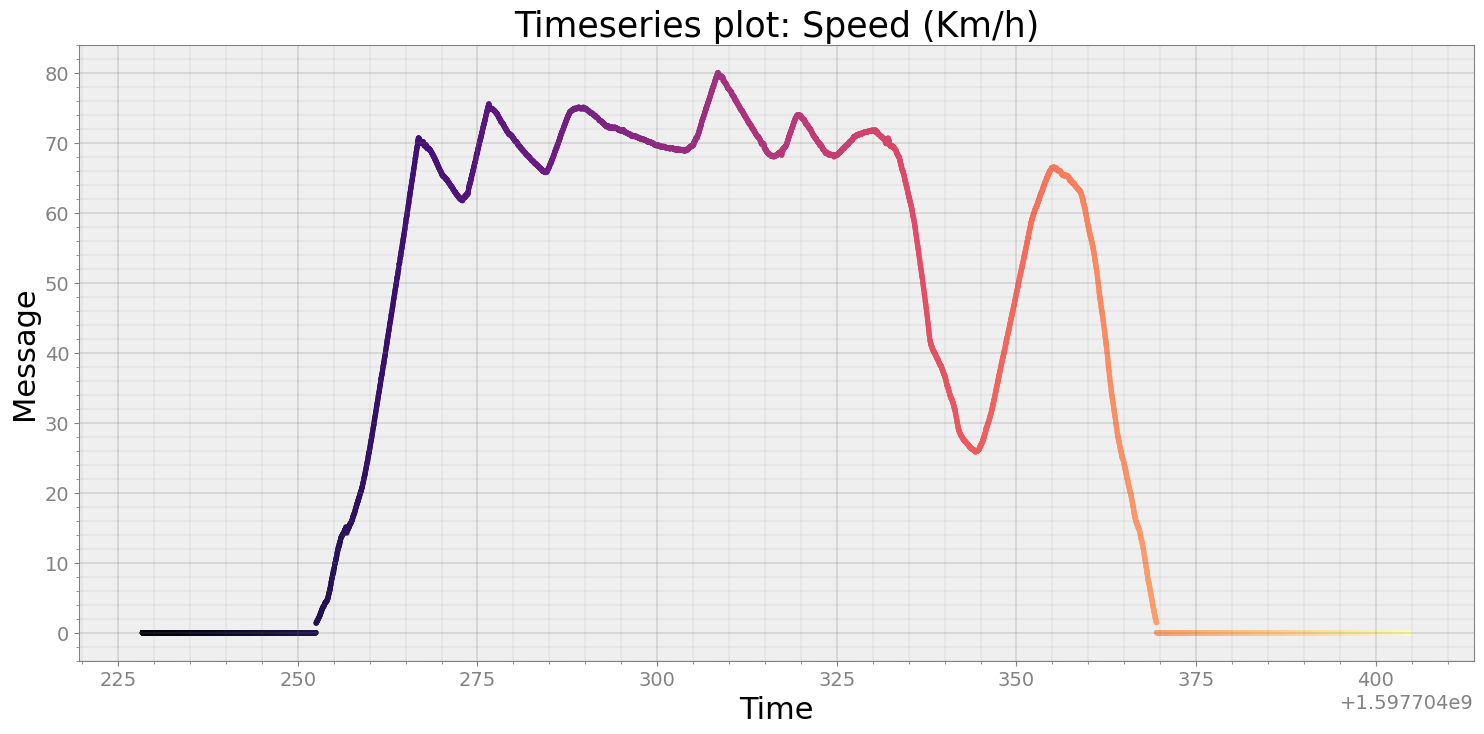

In [7]:
speed = r0.speed()
strymread.plt_ts(speed, title="Speed (Km/h)")

### Create Violin plot and box plot to see distribution of speed data

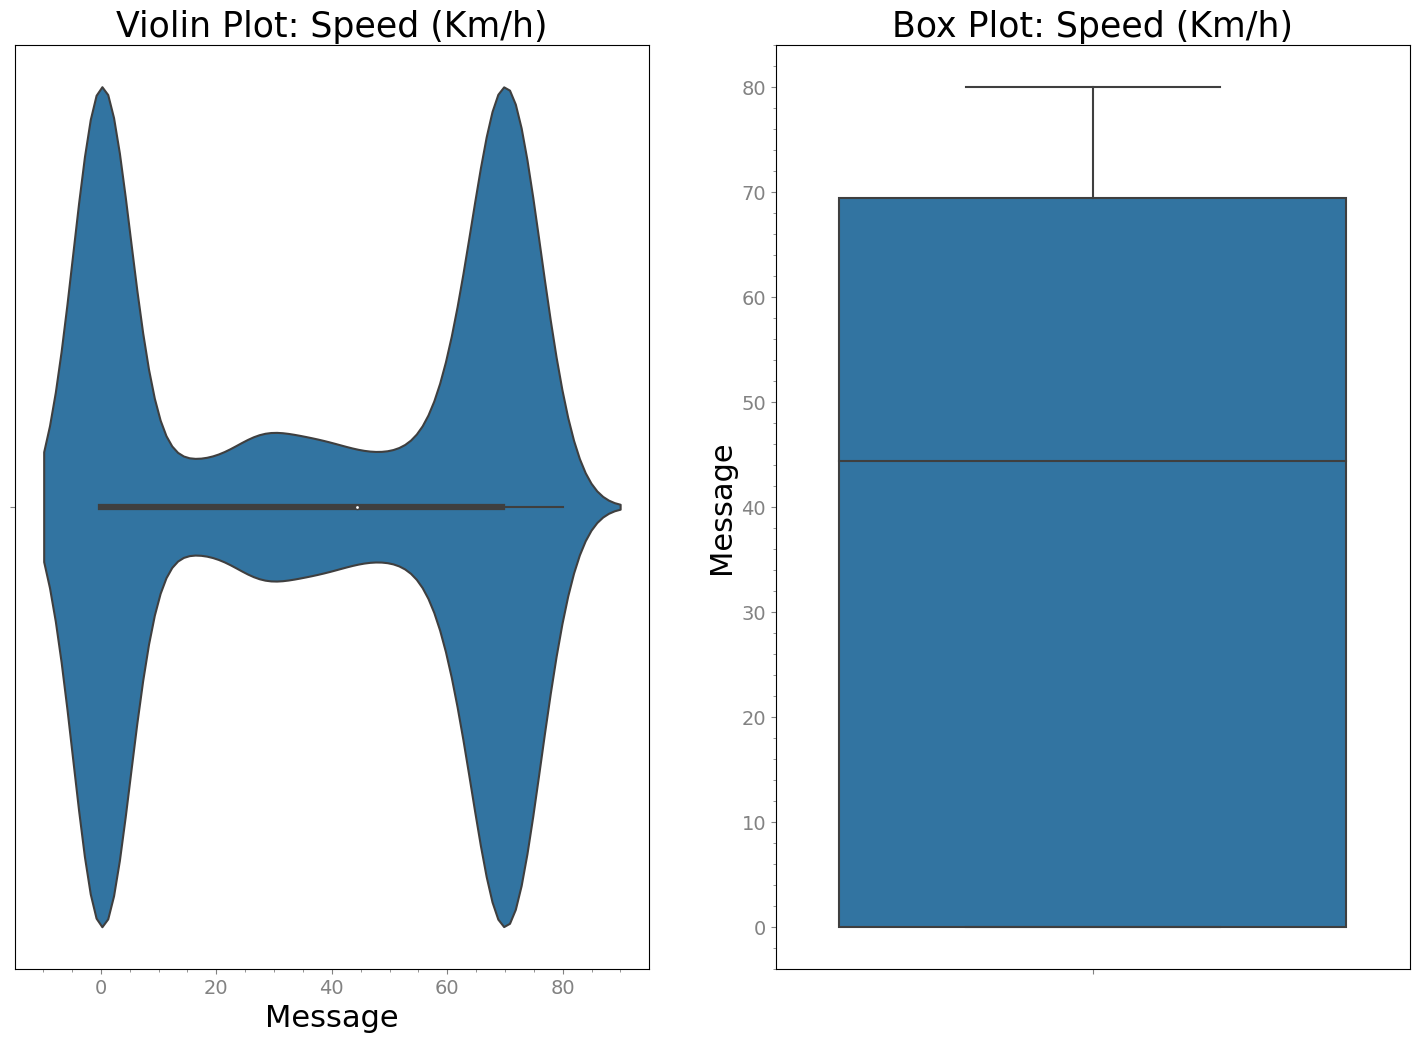

In [8]:
# violin plot of speed data
strymread.violinplot(speed["Message"], title="Speed (Km/h)")

From the violin plot and box plot, we see that data is bimodal with majority of values around 0 km/h or above 40 km/h. Mean is around 20 km/h. It will be interesting to check the characteristics of violin plot for stop-and-go traffic.

### Rate analysis of speed data
We can analyse data throughput of speed data by measuring some statistical characterisitcs of time differences and instantaneous frequency.

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/strym-0.2.2-py3.7.egg/strym/strymread.py:2788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Time'] = df['Time']
/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/strym-0.2.2-py3.7.egg/strym/strymread.py:2790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Clock'] = pd.DatetimeIndex(Time)


Analyzing Timestamp and Data Rate of 705
Interquartile Range of Rate for 705 is 0.6081276952690864 


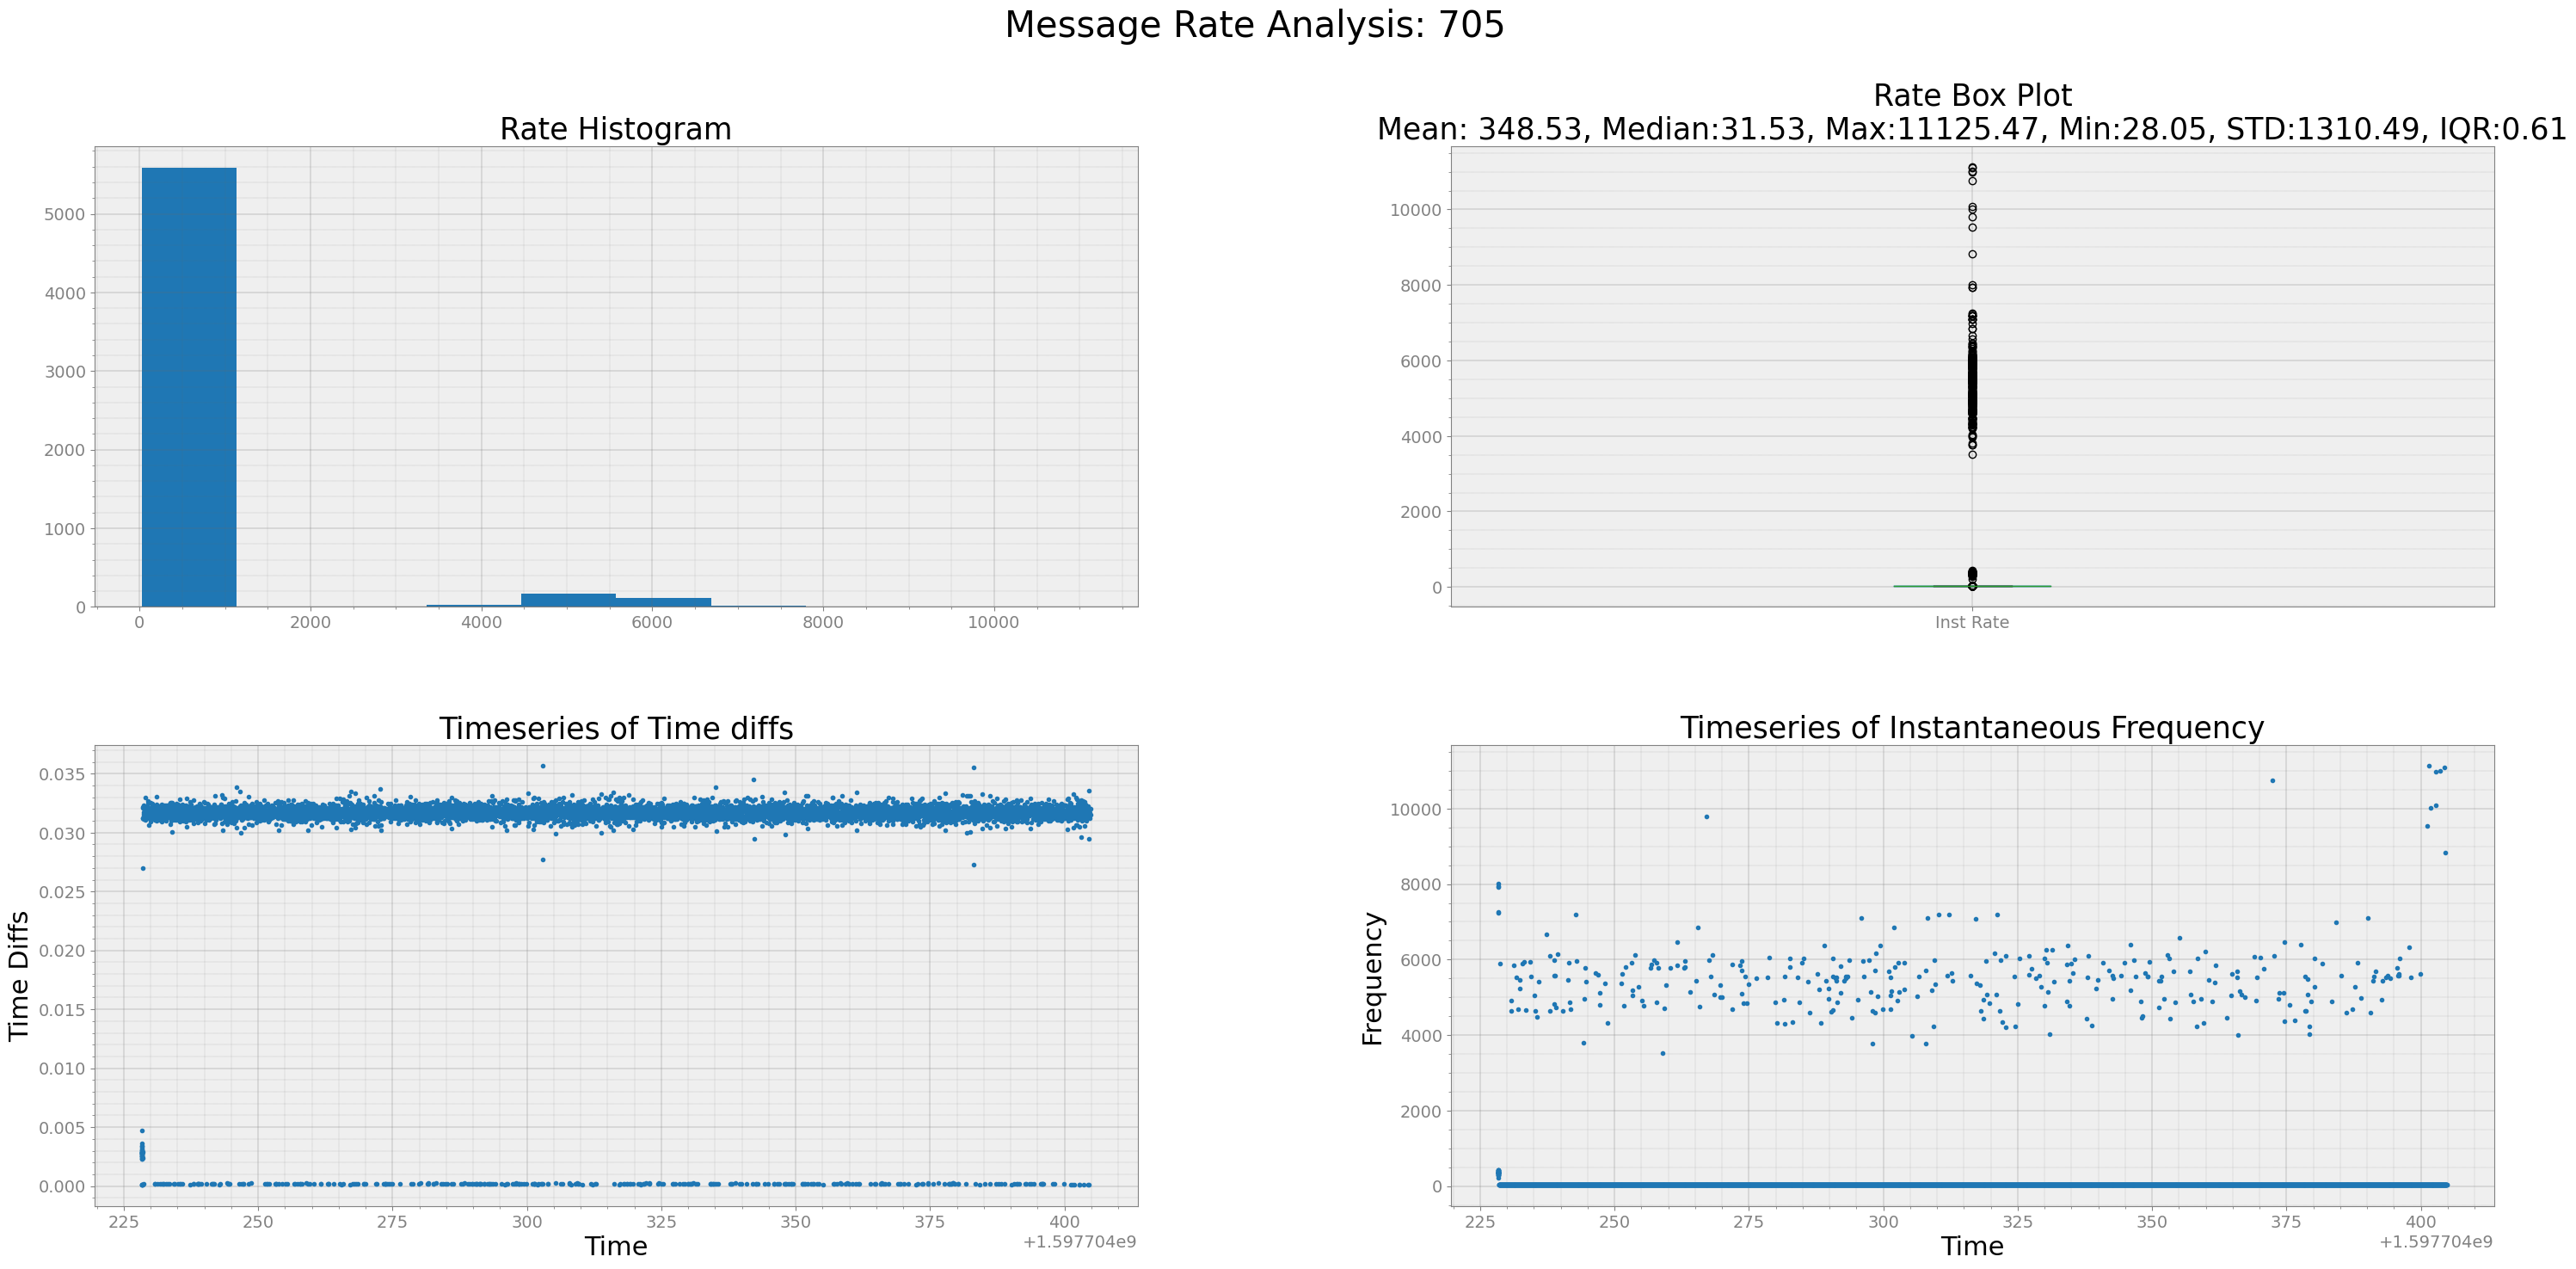

In [11]:
import binascii
import bitstring
import time
import datetime
import serial
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd # Note that this is not commai Panda, but Database Pandas
import cantools 
import matplotlib.animation as animation
from matplotlib import style
import uuid

from strym import strymread
from strym import strymmap
import pandas as pd # Note that this is not commai Panda, but Database Pandas

import binascii
import bitstring

import cantools 
import strym.DBC_Read_Tools as DBC
from datetime import datetime

can_data_all = pd.read_csv(drive1filename)# read in the data
dbcfile = '../examples/newToyotacode_experiment.dbc'
db_file = cantools.db.load_file(dbcfile,strict=False)
# Specify your dbc file# let's get an example where the dat are mauybe not what we expect
_705 = DBC.convertData('GAS_PEDAL',1,can_data_all,db_file)

strymread.ranalyze(_705[0:-1],title="705")
# strym.ranalyze(_705[0:-1],title='Gas Pedal Data')

Analyzing Timestamp and Data Rate of Speed Data
Interquartile Range of Rate for Speed Data is 1.60617979189022 


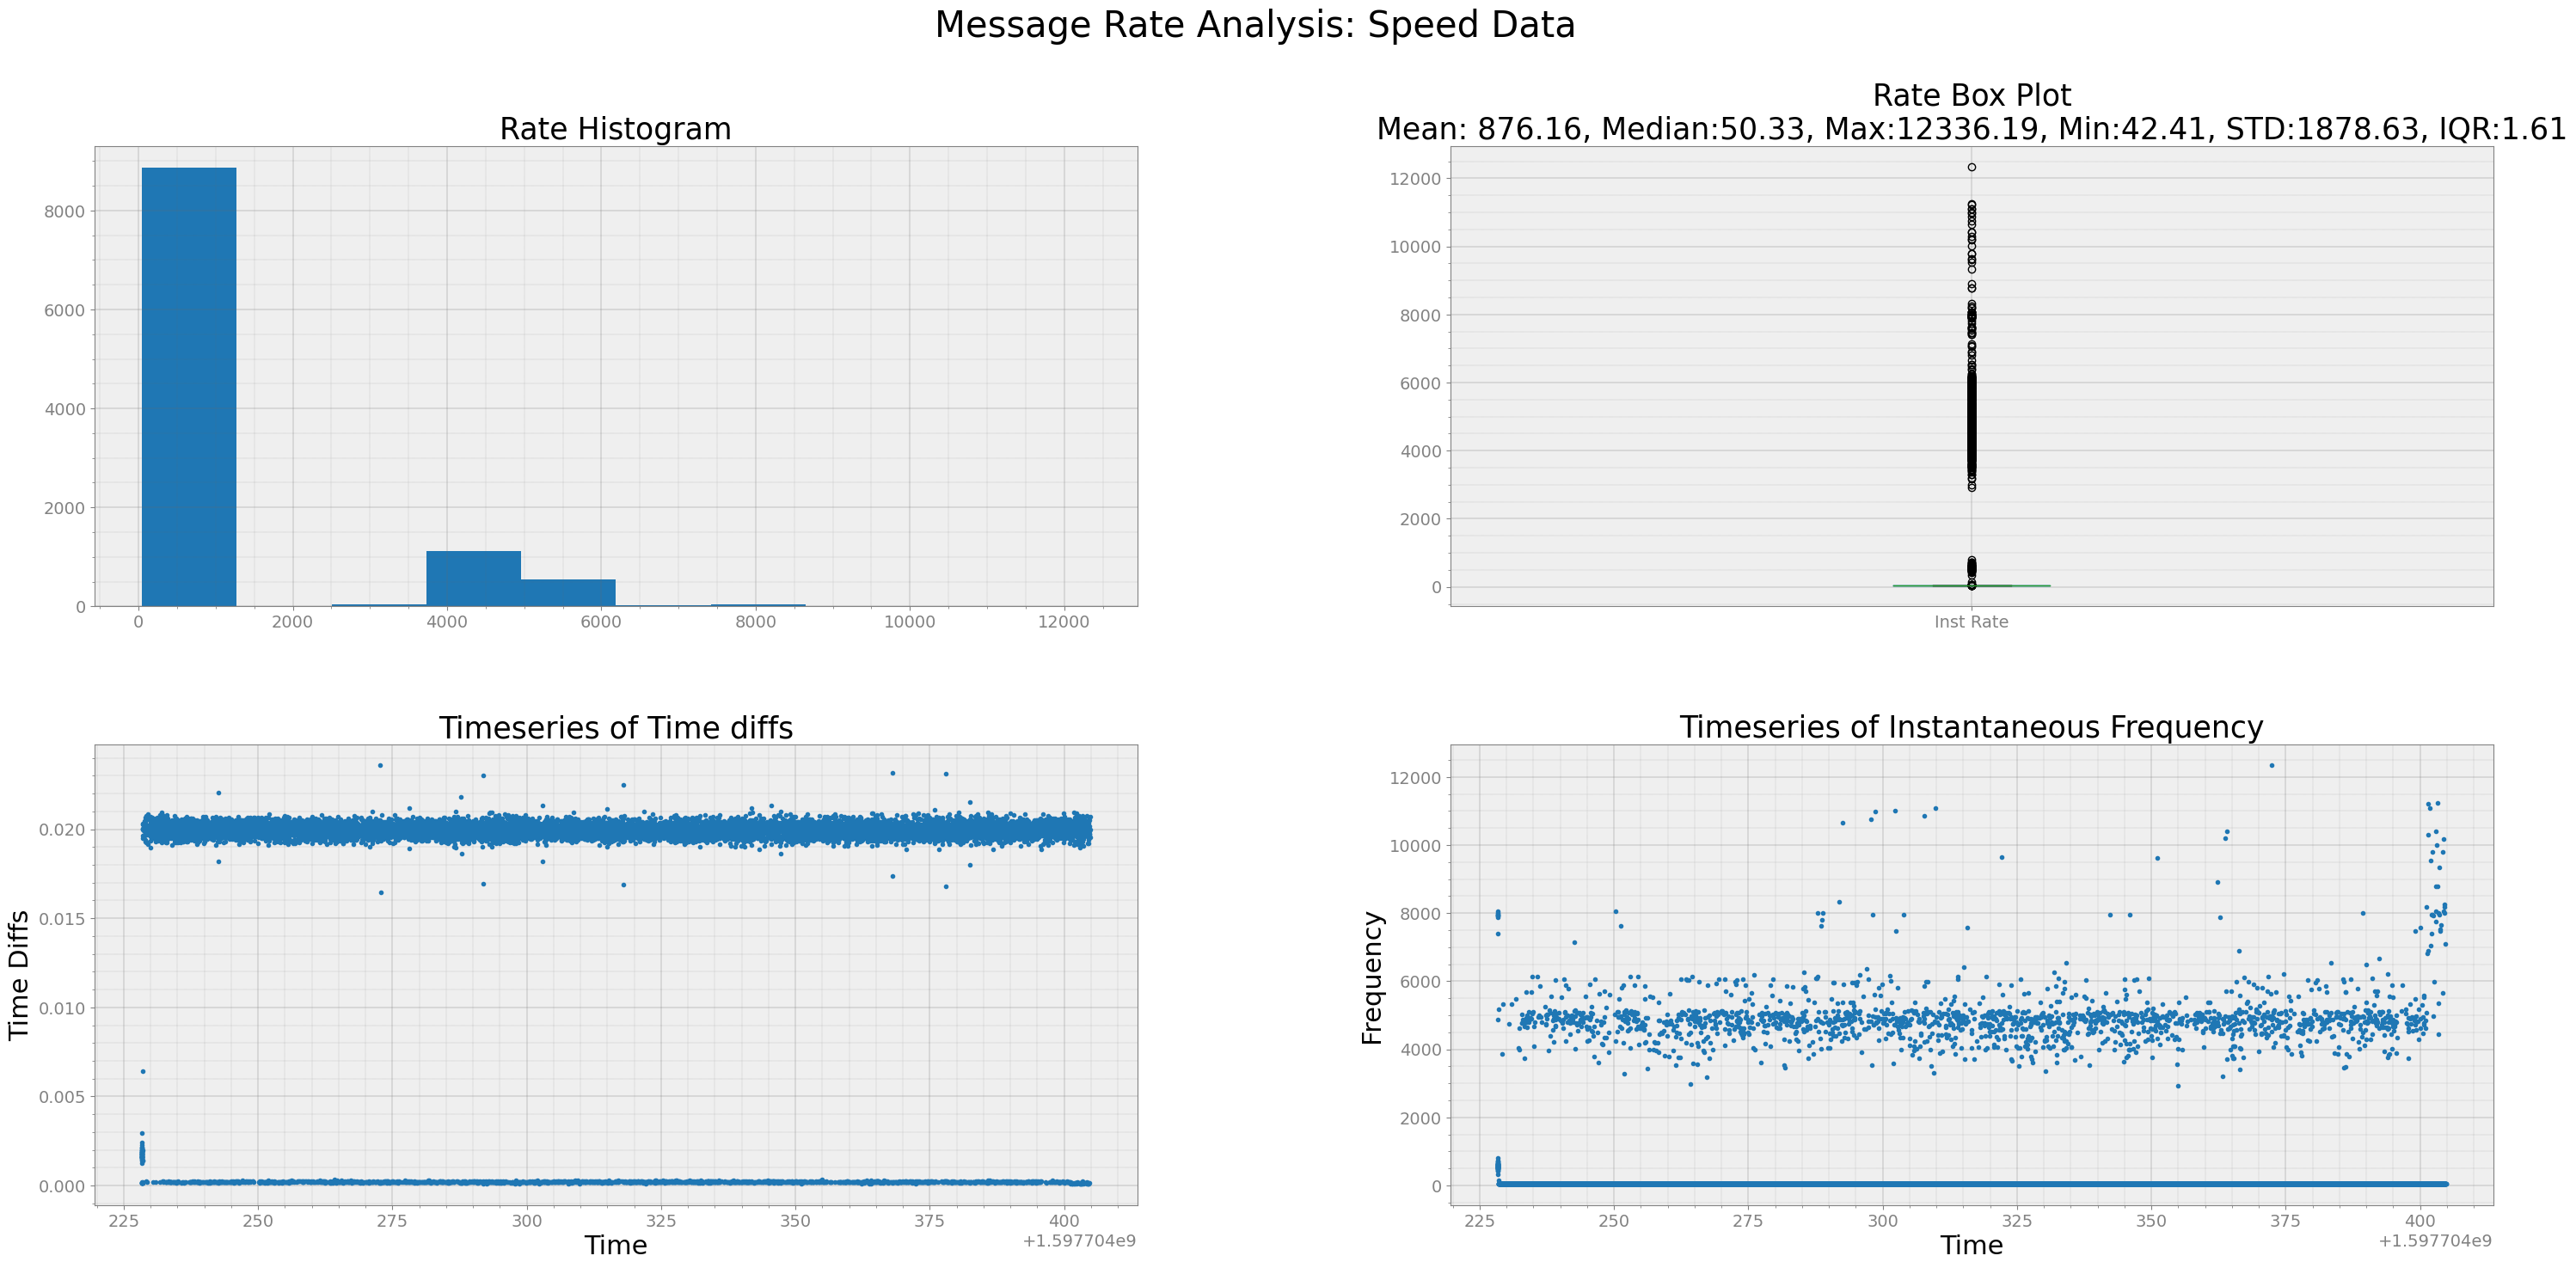

In [12]:
strymread.ranalyze(speed, title='Speed Data')

from above 2x2 plot, we see that speed data came at 50 Hz a little more than half of instances and at 25Hz for little less than half of instances. From box plot, we see that mean data rate is 34.67 Hz and inter-quartile range is 25.05 Hz.  3rd plot is timeseries of time-diffs. Arrival of most of the data has time-difference below 0.05 for most part and some datapoints have arrival interval of more than 0.15 seconds.

### Rate analysis of RADAR traces: TRACK A 0

Analyzing Timestamp and Data Rate of Longitudinal Distance Data: TRACK A 0
Interquartile Range of Rate for Longitudinal Distance Data: TRACK A 0 is 0.1851292761100467 


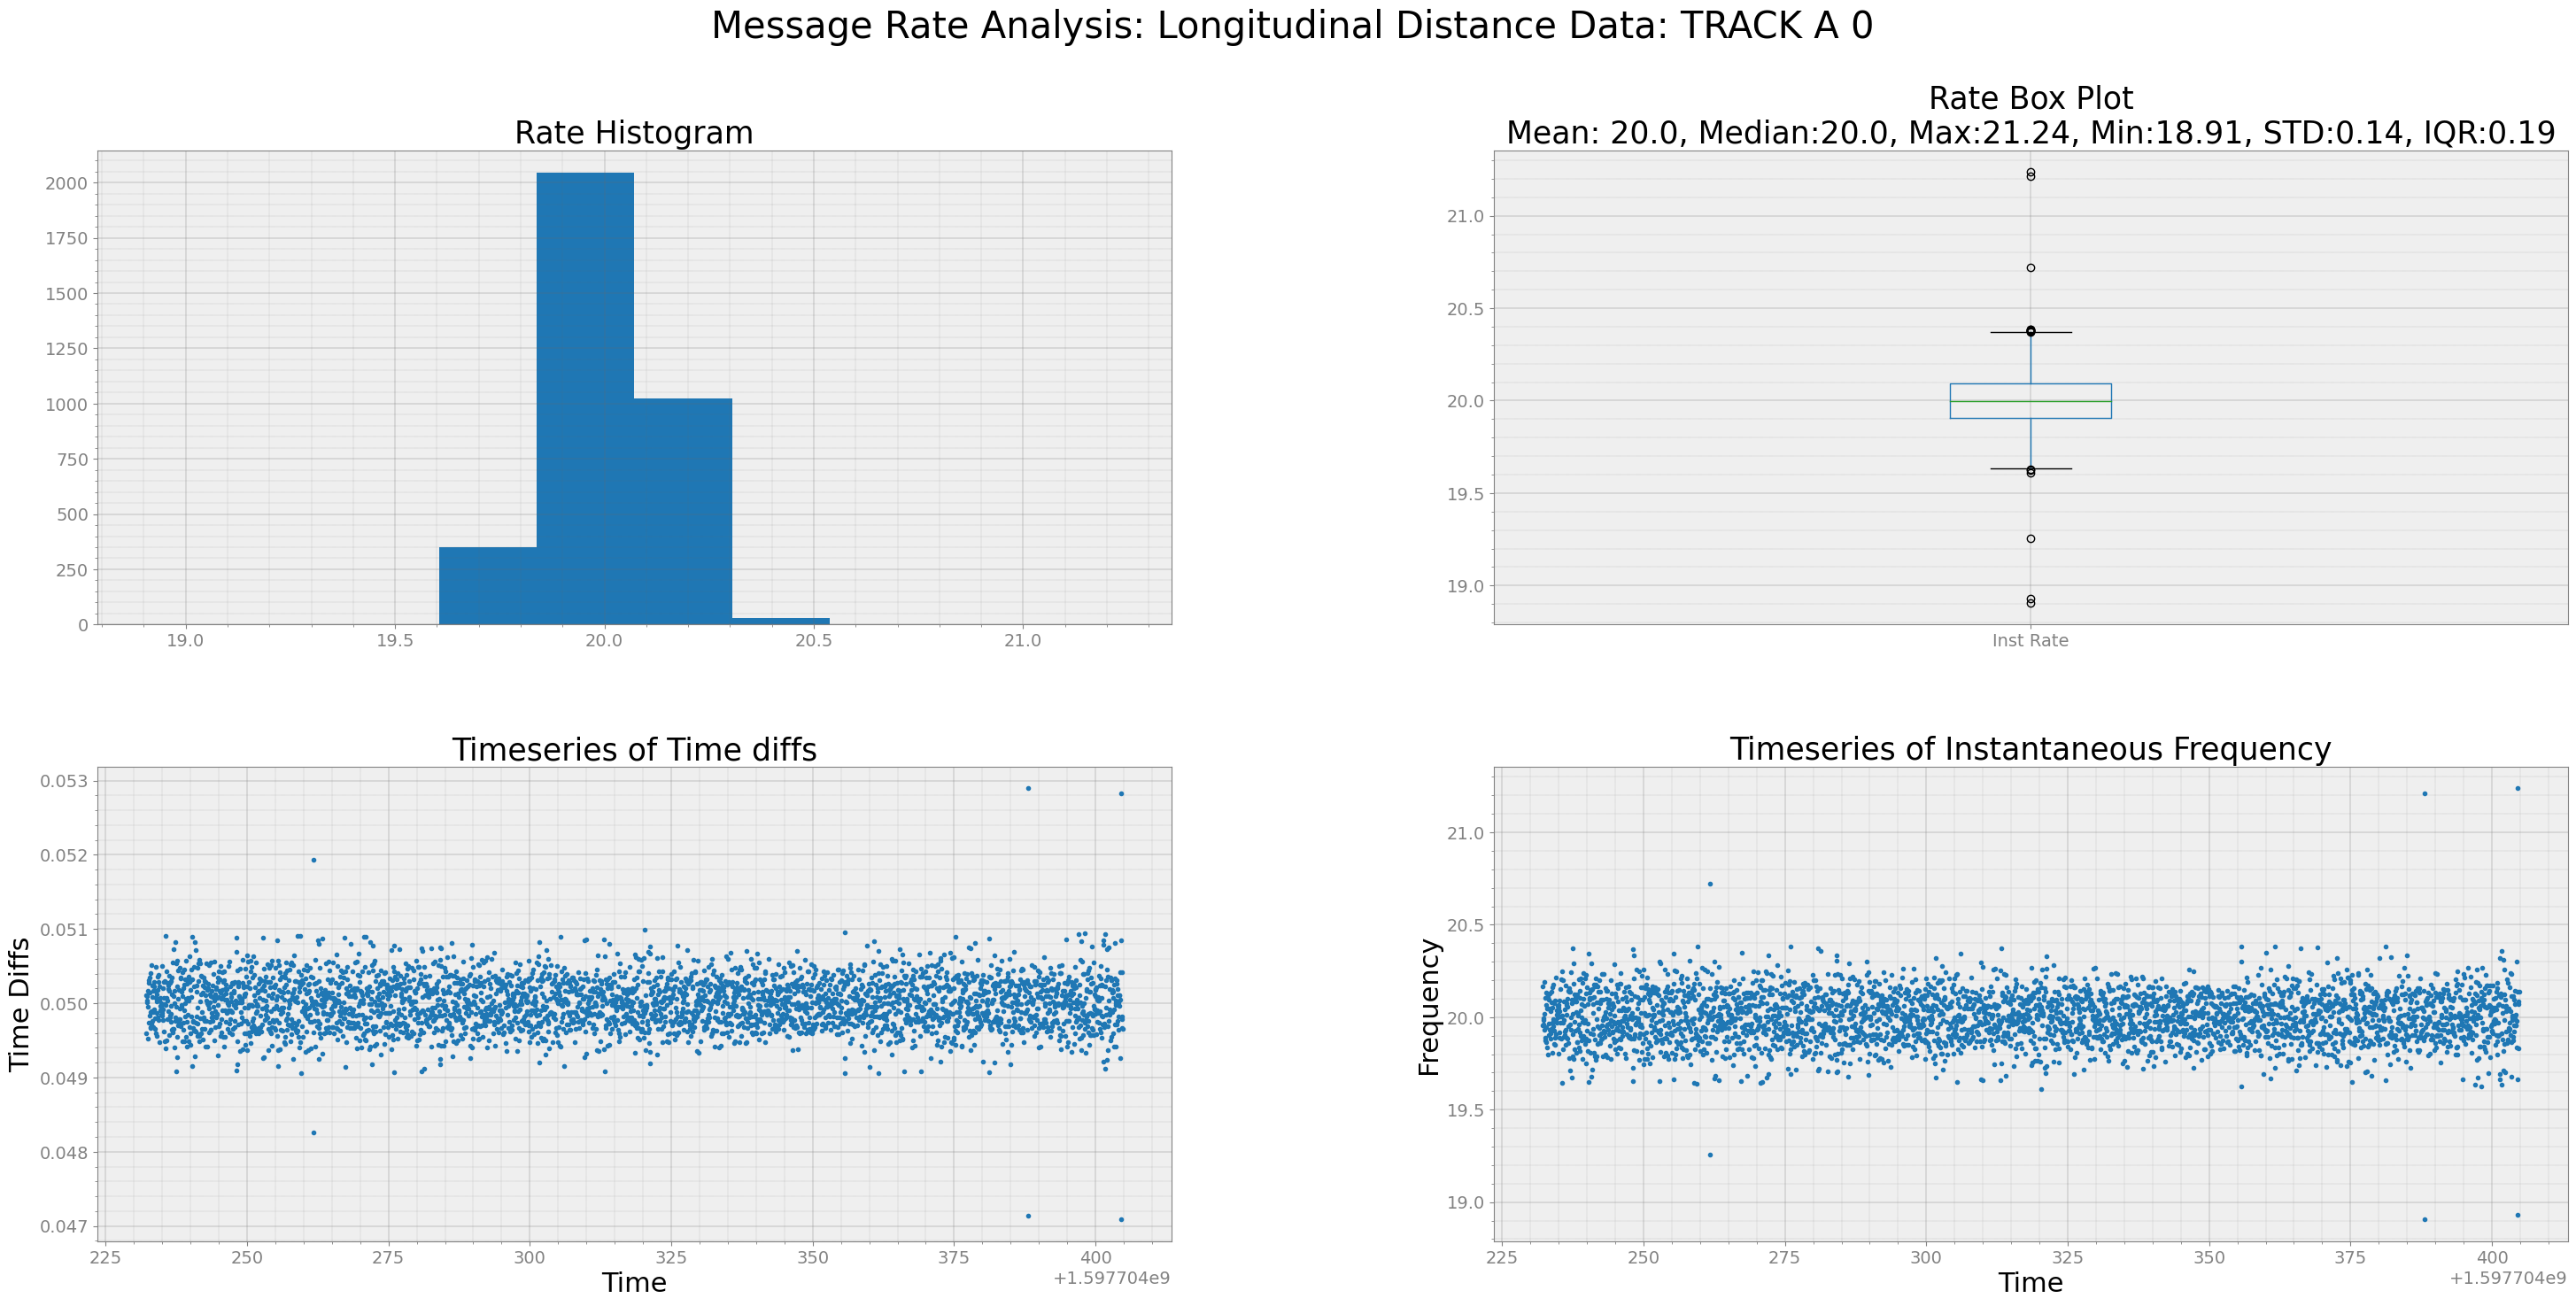

In [13]:
long_dist = r0.long_dist(track_id = 0) # I want to analyze rate for TRACK_A_0 only

strymread.ranalyze(long_dist, title='Longitudinal Distance Data: TRACK A 0')

From above plot, we see that most of the RADAR traces arrive at 20 Hz.